In [1]:
# Let's load some other packages we need
import os
import pandas as pd
import random

import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter

import models
from models import InvertibleNN,Parellel_Renorm_Dynamic
from models import normalize_3d,train_and_memorize,read_and_visulize
#from models import Parellel_Renorm_Dynamic
from EI_calculation import approx_ei
from tqdm import tqdm

from sklearn.neighbors import KernelDensity

from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt



#Whether to use cuda or not
use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0') if use_cuda else torch.device('cpu')
#device =torch.device('cpu')

In [2]:
#
torch.cuda.empty_cache()
f_imgs=np.load('Preprocessed_files/AOMIC_preprocessed_schaefer_100.npy',allow_pickle=True)
f_imgs_norm=normalize_3d(f_imgs)
f_imgs_norm=torch.tensor(f_imgs_norm,device=device).to(torch.float32)

#decide the train and test data
f_imgs_norm_train=f_imgs_norm[:-30,:,:]
f_imgs_norm_test=f_imgs_norm[-30:,:,:]

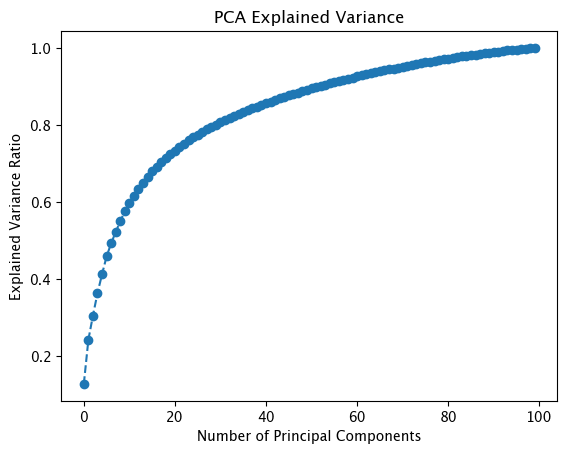

In [3]:
# 进行 PCA 分析
scaler = StandardScaler()
scaler.fit(f_imgs_norm_train.reshape(-1,f_imgs_norm_train.shape[-1]))
f_imgs_zscore=scaler.transform(f_imgs_norm_train.reshape(-1,f_imgs_norm_train.shape[-1]))
pca = PCA(n_components=None)
pca.fit(f_imgs_zscore)

# 获取 explained_variance
explained_variance = pca.explained_variance_ratio_
explained_variance = explained_variance.cumsum()

# 绘制 explained_variance 图
plt.figure()
plt.plot(explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()

In [4]:
#NIS plus
EIs,CEs,LOSSes=train_and_memorize(f_imgs_norm_train,'AOMIC_preprocessed','schaefer_400',epoches=50001,hidden_units = 256,scale=1,batch_size =100,version=0,use_cuda_f=use_cuda)

  0%|          | 0/50001 [00:00<?, ?it/s]

: 

: 

In [ ]:
#arraylize all tensors and save 
loss_array=np.array([LOSSes[i].item() for i in range(len(LOSSes))])
np.save('AOMIC_preprocessed_Results/Losses_kde.npy',loss_array)
EIs_array=np.array(EIs)
np.save('AOMIC_preprocessed_Results/EIs_kde.npy',EIs_array)
CEs_array=np.array(CEs)
np.save('AOMIC_preprocessed_Results/CEs_kde.npy',CEs_array)
#Load all of these data and draw Visulize plots
loss_array=np.load('AOMIC_preprocessed_Results/Losses_kde.npy')
EIs_array=np.load('AOMIC_preprocessed_Results/EIs_kde.npy')
CEs_array=np.load('AOMIC_preprocessed_Results/CEs_kde.npy')

In [ ]:
read_and_visulize(EIs_array,CEs_array,loss_array,dim=f_imgs_norm.shape[2],path_name="AOMIC_preprocessed_Results",method='schaefer_200',version=0)